# Interactive Machine Learning - Exercise 02

In this exercise we we will introduce you to the basics of machine learning with a focus on medical applications. 


The steps you are going to cover in this exercies are as follows:
* Loading and preprocessing the data
* Training and Evaluating a Support Vector Machine
* Defining a Keras Model
* Compiling a Keras Model
* Fitting the Keras Model
* Predicting and Evaluating with the Keras Model

Please read each exercise carefully before you start coding! You will find a number in the comments before each step of coding you will do. Please refer to these numbers if you have any questions.


## 0. Import the libraries
The first step is to define the functions and classes we intend to use in this tutorial.
We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.
Further we use sklearn to accesss code for the Support Vector Machine and a helper file that comes with this notebook.
The helper file contains the functions ```plot_confusion_matrix``` and ```plot_label_distribution```. 

The imports required are listed below.
You can run this cell to import all the libraries for later usage. 
Keep in mind that you can import additional libraries at any time and that you do not need to use all the imports if you know another solution for a given task.

In [31]:
# hidding all warnings to not clutter the notebook
import warnings
warnings.filterwarnings('ignore')

# helper class to plot the confusion matrix
from helper import plot_confusion_matrix, plot_label_distribution

# numpy enables efficient numerical computations for common datastructures
from numpy import loadtxt
import numpy as np

# a python library to help balancing datasets
import imblearn

# scikit-learn is a library for machine learning. we use it to train the support vector machine and evaluation
from sklearn import svm
from sklearn.metrics import classification_report

# tensorflow/keras is a library for neural networks.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

print("libraries successfully imported!")

libraries successfully imported!


## 1. Load Data
We can now load our dataset.  
In this Exercise, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.
As such, it is a binary classification problem (onset of diabetes as 1 or not as 0).  
All of the input variables that describe each patient are numerical.
This makes it easy to use directly with support vector machines and neural networks that expect numerical input and output values.

The input data ist structured as a CSV-file where each row represents the data of one patient and each column a specific feature:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

The last (9th) column contains the label. You will find the file under data/pima-indians-diabetes.csv and more information about the dataset in the readme.md .
In the following code snippet you should write the code to load the data and and the labels into numpy arrays and subsequently scale the value of each feature so that the minimum of each feature in the dataset is 0 and the maximum is 1. 

Helpful links: 
* [Load text with numpy](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html?highlight=numpy%20loadtxt#numpy.loadtxt)
* [Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics))

In [32]:
# 1. load the dataset
with open('data/pima-indians-diabetes.csv') as ds_file:
    data = loadtxt(ds_file, delimiter=',')
print(data)

# 2. split into input (x) and output (y) variables
x, y = np.hsplit(data, np.array([8,]))

# 3. apply min-max feature scaling to bring input data between 0 and 1
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = min_max_scaler.fit_transform(x)

print(x)
print(x.shape)
print(y.shape)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
(768, 8)
(768, 1)


Great, now x should contain the normalized features, and y should contain the labels.
In order to test how well our model works in later steps we now want to split our data in a train and a validation set.

In order to do so, split x into x_train (the first 80% of your data) and x_val (the remaining 20% of your data),
and repeat this for y (y_train and y_val)

In [33]:
# 4. split x and y into a 80 / 20 train and validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((614, 8), (154, 8), (614, 1), (154, 1))

Now we are almost ready to train our model. But before we do that let's have closer look at our training data. 
We have already learned that the distribution of the labels during training can have a huge impact on the final performance of our model.
One way to tackle this hurdle is the application of over- and under-sampling. 
In the following will preprocess your data as follows: 
 
* First plot the label distribution of your current training data. To this end you can use ```plot_label_distribution(labels, classes=['No Diabetis', 'Diabetis'])``` function from the helper class.
* Apply a resampling approach of your own choosing
* Plot the label distribution of your current training data again to verify the results

Helpful links:
* [imblearn undersampling methods](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.under_sampling)
* [imblearn oversampling methods](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling)
* [imblearn tutorial](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

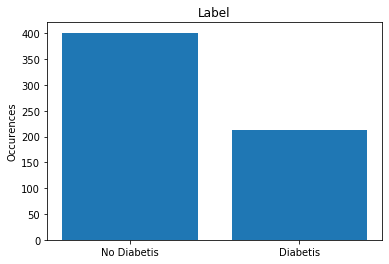

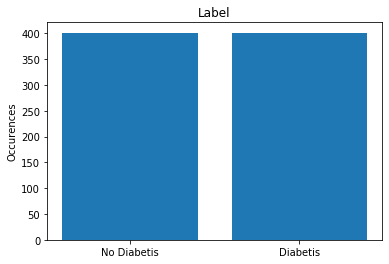

In [34]:
# 5. plotting the label distribution for the training data
plot_label_distribution(y_train, classes=['No Diabetis', 'Diabetis'])
# 6. apply a balancing algorithm of your choice (e.g. smote)
sm = imblearn.over_sampling.SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)
# 7. plot the label distribution again
plot_label_distribution(y_res, classes=['No Diabetis', 'Diabetis'])

## 2. Support Vector Machines
Now we are done preparing our data. In this exercise we want to work with two different classification algorithms.
The first one is a Support Vector Machine (SVM) based on the sklearn library.
For this step, you will:

* Create a SVM Classifier with a linear Kernel

* Train your model using the ```fit()``` function on x_train and y_train

* Predict the labels in ```y_pred``` for the Validation set ```x_val```

Helpful links:
* [Support Vector Machines with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Support Vector Machine tutorial on datacamp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)


In [35]:
# 8. Create a svm Classifier
clf = svm.LinearSVC()
# 9. Train the model using the training sets
clf.fit(x_train, y_train)
# 10. Predict the response for test dataset
y_pred = clf.predict(x_val)
print(y_pred)
print("SVM classifier is trained and x_val is predicted")

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
SVM classifier is trained and x_val is predicted


Evaluation:

In order to evaluate the model a simple method is to print a few entries from the prediction set and to compare them with the validation set.

In [45]:
# 11. summarize the first 50 cases
for pred, ground_truth in zip(y_pred[:50], y_val[:50]):
    print(f'Predicted label: {pred}, ground truth label: {ground_truth[0]} .')
    if pred != ground_truth[0]:
        print('misclassified...')

Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground t

If we want to get some more meaningful information about the quality of your model you should use
the sklearn function classification_report and plot a confusion matrix.

In order to do so, you can call
```plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix', cmap=None, normalize=True, decimals=2)```
from the file helper.py.

Helpful links:
* [classication_report description](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


              precision    recall  f1-score   support

 No Diabetes       0.82      0.82      0.82        99
    Diabetes       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Normalized confusion matrix


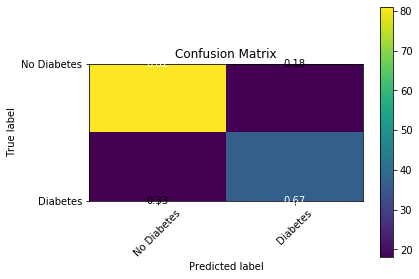

In [37]:
# 12. Call sklearn's classification report - For your orientation: your model should reach an average recall (macro) of > 0.75
class_names = ['No Diabetes', 'Diabetes']
print(classification_report(y_val, y_pred, target_names=class_names))
# 13. Call plot_confusion_matrix to paint the confusion matrix
plot_confusion_matrix(y_val, y_pred, class_names, title='Confusion Matrix', cmap=None, normalize=True, decimals=2)

Great, you now have trained and evaluated a model that was trained with a Support Vector machine.
That was easy right? Support Vector Machines have the advantage that they are fast, and don't need parameter tuning in most cases. So for many classification and regression tasks they do a decent job.

But how do they perform compared to artifical neural neworks?

In the next chapters we will repeat these last steps, but this time with an artifical neural network defined in Keras.

## 3. Define Keras Model

Models in Keras are defined as a sequence of layers. 
We create a Sequential model and one hidden layer and an output layer to it. 
The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables. 
How do we know the number of layers and their types?  
This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem. 
In this example, we will use a fully-connected network structure with two layers. 
Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument. 
We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer. 
It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5. 
We can piece it all together by adding each layer:

* The model expects rows of data with 8 variables (the input_dim=8 argument)
* The hidden layer has 12 nodes and uses the relu activation function.
* The output layer has one node and uses the sigmoid activation function.

Helpful links: 
* [Keras guide to the sequential api](https://keras.io/getting-started/sequential-model-guide/)
* [Activation Functions](https://keras.io/getting-started/sequential-model-guide/)

In [38]:
# 14. define the keras model
model = Sequential()

input_layer = Input(shape=(8,))
hidden_layer = Dense(units=12, activation='relu')
output_layer = Dense(units=1, activation='sigmoid')

model.add(input_layer)
model.add(hidden_layer)
model.add(output_layer)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 4. Compile Keras Model

Now that the model is defined, we can compile it. 
Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.
When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.  
We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.
In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as *binary_crossentropy*. 
We will define the optimizer as the efficient stochastic gradient descent algorithm *adam*. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

Helpful links: 
* [How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
* [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [39]:
# 15. compile the keras model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam()
loss = BinaryCrossentropy()

model.compile(optimizer=opt, loss=loss, metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 5. Fit Keras Model
We have defined our model and compiled it ready for efficient computation.
Now it is time to execute the model on some data.
We can train or fit our model on our loaded data by calling the ```fit()```  function on the model.
Training occurs over epochs and each epoch is split into batches.
Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs.
What is the Difference Between a Batch and an Epoch in a Neural Network?
The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.  
For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.
These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

Helpful links:
*  [Difference between a batch and an epoch](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

In [40]:
# 16. fit the keras model on the dataset
model.fit(x=x_train, y=y_train, batch_size=10, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/62 [..............................] - ETA: 0s - loss: 0.8392 - acc: 0.2000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1a40010950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

## 6.Make Predictions

After I train my model, how can I use it to make predictions on new data? - Great question.
We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before.
Making predictions is as easy as calling the ```predict()``` function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

Helpful links: 
* [Keras predict](https://keras.io/models/model/#predict)

In [41]:
# 17. make probability predictions with the model
y_pred = model.predict(x_val)
print(y_pred[:10])
# 18. use the round function to round each entry of y_pred to either 0.0 or 1.0
y_pred = np.around(y_pred)
print(y_pred[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0.4072991 ]
 [0.12646544]
 [0.09820765]
 [0.2048119 ]
 [0.43085426]
 [0.50181544]
 [0.01928678]
 [0.69564414]
 [0.72687006]
 [0.60709774]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]


## 7.Evaluation
Great, we are almost done now:
Exactly as in the Support Vector Machine example, we now want to print the first 50 entries from the prediction set and to compare them with the validation set.


In [46]:
# 19. summarize the first 50 cases
for pred, ground_truth in zip(y_pred[:50], y_val[:50]):
    print(f'Predicted label: {pred}, ground truth label: {ground_truth[0]} .')
    if pred != ground_truth[0]:
        print('misclassified...')

Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [1.], ground truth label: 0.0 .
misclassified...
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground truth label: 1.0 .
misclassified...
Predicted label: [0.], ground truth label: 0.0 .
Predicted label: [0.], ground t

Additionally, once again,  we want to use sklearn's classification report, as well as the plot_confusion_matrix function in order to print the confusion matrix.

              precision    recall  f1-score   support

 No Diabetes       0.82      0.81      0.82        99
    Diabetes       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Normalized confusion matrix


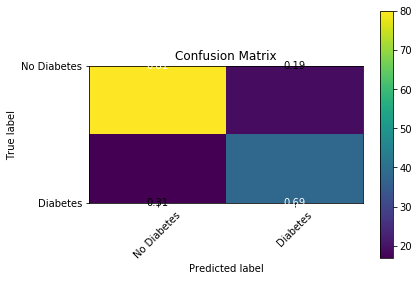

In [43]:
# 20. Call sklearn's classification report
print(classification_report(y_val, y_pred, target_names=class_names))
# 21. Call plot_confusion_matrix to paint the confusion matrix - For your orientation: your model should reach an average recall (macro) of > 0.75
plot_confusion_matrix(y_val, y_pred, class_names, title='Confusion Matrix', cmap=None, normalize=True, decimals=2)

## 8. So?

Compare the performance scores and confusion matrices of both models, and write down some of your observations:

In [44]:
# 22. Leave some comments about how well both Classification Systems
# performed and which one you would prefer to use for a task like this.
"""
NN Model:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.81      0.82        99
    Diabetes       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

SVM classifier:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.82      0.82        99
    Diabetes       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Recall in our case refers to the test's ability to correctly detect ill patients who do have the diabetes.
Recall = number of true positives / total number of sick patients. So, for us it is more important to detect as much as possible ill patients. That is why we have to choose the NN classifier, as its recall for label 'Diabetes' is 2% higher than SVM classifiers', macro avg recall and weighted avg values are the same.

"""


"\nNN Model:\n              precision    recall  f1-score   support\n\n No Diabetes       0.81      0.77      0.79        99\n    Diabetes       0.62      0.67      0.64        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.72      0.72       154\nweighted avg       0.74      0.73      0.74       154\n\nSVM classifier:\n              precision    recall  f1-score   support\n\n No Diabetes       0.82      0.82      0.82        99\n    Diabetes       0.67      0.67      0.67        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.75      0.75       154\nweighted avg       0.77      0.77      0.77       154\n\nRecall in our case refers to the test's ability to correctly detect ill patients who do have the diabetes.\nRecall = number of true positives / total number of sick patients. So, for us it is more important to detect as much as possible ill patients. That is why we have to choose the SVM classifi